- 학습의 목표
- 머신러닝의 분류모델을 이용하여, 여러가지 평가지표를 적용하여 확인
- 의학(당뇨병 여부 판단) / 피마 인디언 당뇨병 예측

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler,Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve,roc_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [18]:
diabetes_df = pd.read_csv('./data/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
# target 분포 확인
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
# 분류를 위한 예측모델 생성
# 모델 셀렉션, 교차검증
# 학습, 예측 및 평가
diabetes_label= diabetes_df['Outcome']
diabetes_feature_df = diabetes_df.drop(['Outcome'],axis=1)
print(diabetes_feature_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_feature_df,
                                                   diabetes_label,
                                                   random_state=100,
                                                   test_size=0.2)

In [112]:
# 교차검증 

cross_test = cross_val_score(lr_model,diabetes_feature_df,diabetes_label,scoring='accuracy',cv=5)
print('교차검증 : ',cross_test)
print('교차검증평균 : ',cross_test.mean())

교차검증 :  [0.77272727 0.74675325 0.75974026 0.81699346 0.75163399]
교차검증평균 :  0.7695696460402341


In [7]:
# 임계값별 정밀도 - 재현율을 확인 및 시각화
def display_eval(y_test,y_pred):
    confusion = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print()
    print(confusion)
    print('*'*50)
    print()
    print('정확도 : {} , 정밀도 : {} , 재현율 : {}'.format(accuracy,precision,recall))

In [137]:
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test, prediction)


[[87 14]
 [24 29]]
**************************************************

정확도 : 0.7532467532467533 , 정밀도 : 0.6744186046511628 , 재현율 : 0.5471698113207547


In [55]:
# 랜덤포레스트
rd_model = RandomForestClassifier()
rd_model.fit(X_train,y_train)
prediction = rd_model.predict(X_test)
display_eval(y_test, prediction)


[[104  23]
 [ 33  32]]
**************************************************

정확도 : 0.7083333333333334 , 정밀도 : 0.5818181818181818 , 재현율 : 0.49230769230769234


In [56]:
# 결정트리
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
prediction = dt_model.predict(X_test)
display_eval(y_test, prediction)


[[99 28]
 [34 31]]
**************************************************

정확도 : 0.6770833333333334 , 정밀도 : 0.5254237288135594 , 재현율 : 0.47692307692307695


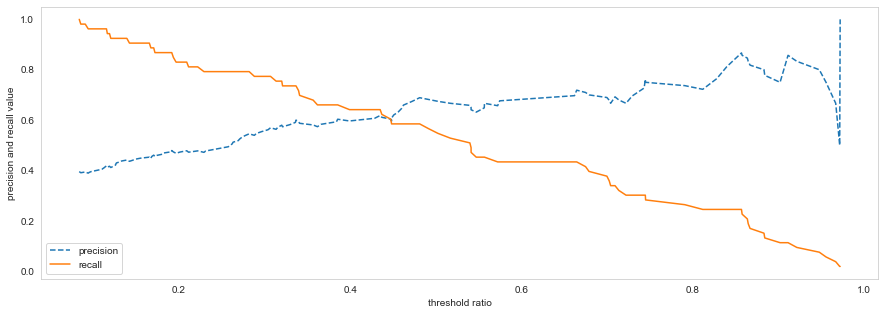

In [138]:
# 정밀도 재현율 시각화

pred_positive_label = lr_model.predict_proba(X_test)[:,1]

precisions, recalls , thresholds = precision_recall_curve(y_test,pred_positive_label)

plt.figure(figsize=(15,5))

plt.plot(thresholds,precisions[0:thresholds.shape[0]],linestyle='--',label='precision')
plt.plot(thresholds,recalls[0:thresholds.shape[0]],label = 'recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show()

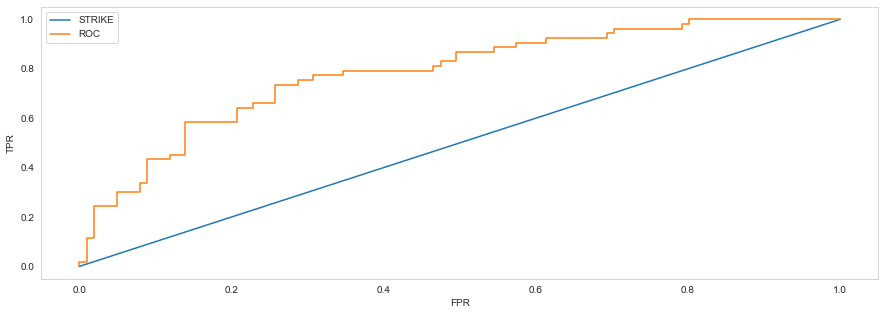

In [127]:
# roc curve()
pred_positive_label = lr_model.predict_proba(X_test)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#대각선
plt.plot([0,1],[0,1],label='STRIKE')

#ROC
plt.plot(fprs,tprs,label='ROC')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

In [128]:
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
print('roc auc value {}'.format(roc_auc_score(y_test,prediction)))

roc auc value 0.704277974967308


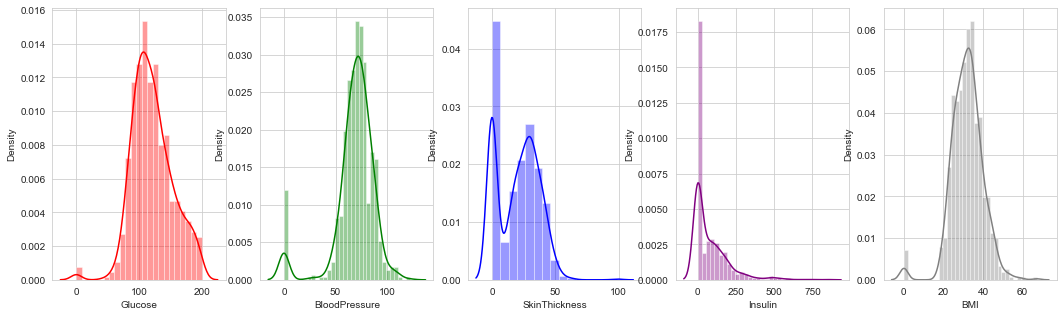

In [96]:
# 히스토그램 그리기
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')


# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)


# 기본값

sns.distplot(diabetes_feature_df['Glucose'], ax=ax1,color='red')
sns.distplot(diabetes_feature_df['BloodPressure'], ax=ax2,color='green' )
sns.distplot(diabetes_feature_df['SkinThickness'], ax=ax3,color='blue' )
sns.distplot(diabetes_feature_df['Insulin'], ax=ax4,color='purple' )
sns.distplot(diabetes_feature_df['BMI'], ax=ax5,color='grey' )

plt.show()

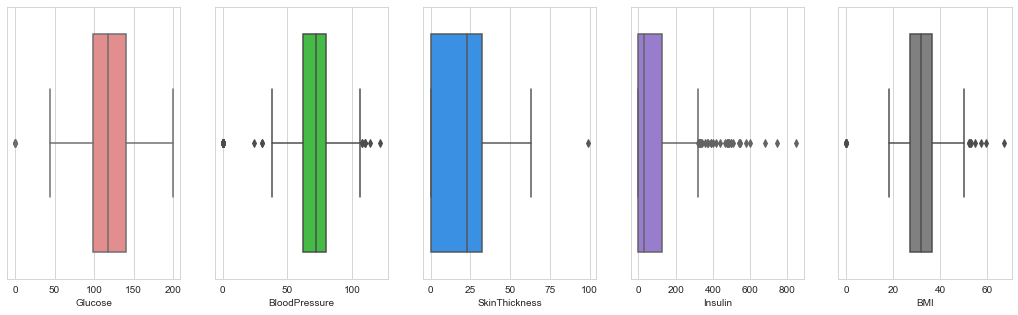

In [104]:
# 박스플랏 그리기
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')


# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)


# 기본값

sns.boxplot(diabetes_feature_df['Glucose'], ax=ax1,color='lightcoral')
sns.boxplot(diabetes_feature_df['BloodPressure'], ax=ax2,color='limegreen' )
sns.boxplot(diabetes_feature_df['SkinThickness'], ax=ax3,color='dodgerblue' )
sns.boxplot(diabetes_feature_df['Insulin'], ax=ax4,color='mediumpurple' )
sns.boxplot(diabetes_feature_df['BMI'], ax=ax5,color='grey' )

plt.show()

In [ ]:
# 데이터 전처리 후 

In [141]:
# feature 값에 0이 존재하는 것을 확인 -> 0의 값을 변화 시켜야함 1)평균2)중앙값
diabetes_feature_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [20]:
# 1) 평균으로 대체
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
mean_zero_features = diabetes_feature_df[zero_features].mean()
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [21]:
diabetes_feature_df[zero_features]=diabetes_feature_df[zero_features].replace(0,mean_zero_features)

In [29]:
diabetes_feature_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [30]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_feature_df,
                                                   diabetes_label,
                                                   random_state=150,
                                                   test_size=0.2)

In [31]:
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test, prediction)


[[89 13]
 [20 32]]
**************************************************

정확도 : 0.7857142857142857 , 정밀도 : 0.7111111111111111 , 재현율 : 0.6153846153846154


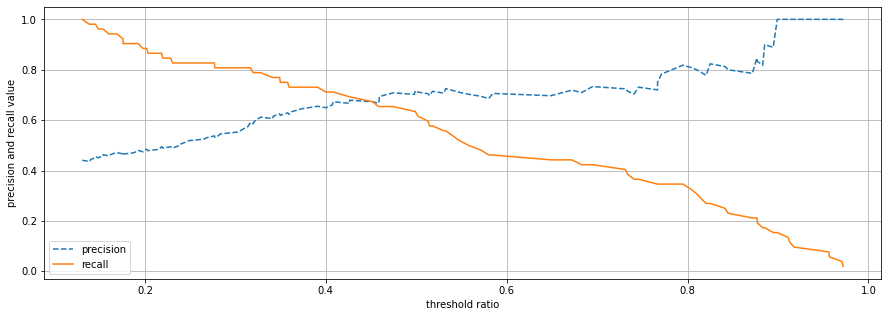

In [32]:
# 정밀도 재현율 시각화

pred_positive_label = lr_model.predict_proba(X_test)[:,1]

precisions, recalls , thresholds = precision_recall_curve(y_test,pred_positive_label)

plt.figure(figsize=(15,5))

plt.plot(thresholds,precisions[0:thresholds.shape[0]],linestyle='--',label='precision')
plt.plot(thresholds,recalls[0:thresholds.shape[0]],label = 'recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show()

In [39]:
pred_prova=lr_model.predict_proba(X_test)[:,1].reshape(-1,1)

In [40]:
# 임계값을 0.45로변경
binarizer = Binarizer(threshold=0.45)
pred_th_45 = binarizer.fit_transform(pred_prova)
display_eval(y_test, pred_th_45)


[[85 17]
 [17 35]]
**************************************************

정확도 : 0.7792207792207793 , 정밀도 : 0.6730769230769231 , 재현율 : 0.6730769230769231


In [14]:
# 표준화

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler객체 생성
sd_scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
X_train =sd_scaler.fit(X_train).transform(X_train)
X_test = sd_scaler.transform(X_test)

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test, prediction)


[[86 15]
 [26 27]]
**************************************************

정확도 : 0.7337662337662337 , 정밀도 : 0.6428571428571429 , 재현율 : 0.5094339622641509


In [16]:
# 정규화
# MinMaxScaler객체 생성
m_scaler = MinMaxScaler()
# 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
X_train = m_scaler.fit(X_train).transform(X_train)
X_test = m_scaler.transform(X_test)

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test, prediction)


[[87 14]
 [28 25]]
**************************************************

정확도 : 0.7272727272727273 , 정밀도 : 0.6410256410256411 , 재현율 : 0.4716981132075472
